## KEGGLE #1  
- SUBJECT: TITANIC  
- AUTHOR: SungwookLE(joker1251@naver.com)
- DATE: '21.6/21  
- FROM: [KEGGLE](https://www.kaggle.com/c/titanic)
- REFERENCE:  
[1]. [#1 LECTURE](https://www.youtube.com/watch?v=aqp_9HV58Ls&list=RDCMUCxP77kNgVfiiG6CXZ5WMuAQ&index=3)  
[2]. [#2 LECTURE](https://www.youtube.com/watch?v=nXFXAxfdIls&list=PLVNY1HnUlO25B-8Gwn1mS35SD0yMHh147&index=3)  
[3]. [#3 LECTURE](https://www.youtube.com/watch?v=FAP7JOECfEE&list=RDCMUCxP77kNgVfiiG6CXZ5WMuAQ&index=1)  

### The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

![image](https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w)

### Overview
The data has been split into two groups:  
- training set (train.csv)
- test set (test.csv)  

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### Data Dictionary
||||
|:--|:--|:--|
|Variable|Definition|Key|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||	
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

### Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
'''
패키지 라이브러리 (pandas, numpy) import
'''
import pandas as pd
import numpy as np

In [2]:
train_original = pd.read_csv('input/train.csv')
test_original = pd.read_csv('input/test.csv')

train = train_original.copy()
test = test_original.copy()


### 데이터 분석
아래의 순서대로 진행, STEP마다 DATA VISUALIZATION & DISCUSSION  
- 1) 데이터 살펴보기    
- 2) Feature 추출  
- 3) 학습  

### 1단계: 데이터 살펴보기
- 데이터를 직접 눈으로 보고, 결측데이터가 있는지,
- 데이터 항목과 Survived는 어떤 연관성이 있는지 살펴보고 feature로 선택할 필요가 없을지 고민하기

In [3]:
# 1단계 데이터 살펴보기
print("SHAPE: ", train.shape)
print(train.isnull().sum())
train.head(3)

SHAPE:  (891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print("SHAPE: ", test.shape)
print(test.isnull().sum())
test.head(3)

SHAPE:  (418, 11)
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
# VISUALIZATION 라이브러리리 호출
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() #Setting Seaborn default for plots

In [8]:
def bar_chart(df, feature):
    survived = df.loc[df['Survived']==1,feature].value_counts()
    dead = df.loc[df['Survived']==0, feature].value_counts()
    mat = pd.DataFrame([survived, dead])
    mat.index = ['Survived','Dead']
    mat.plot(kind='bar', stacked = True, figsize=(10,5))


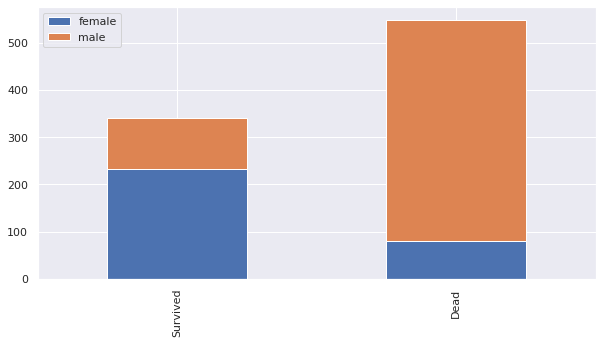

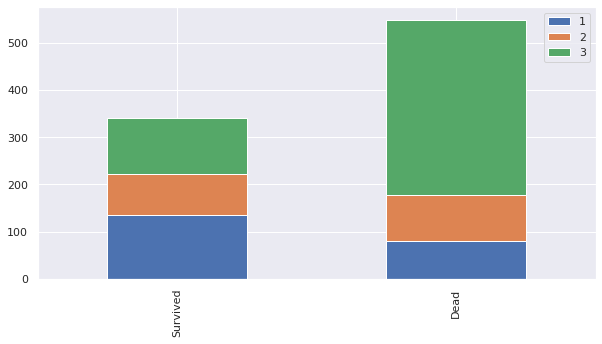

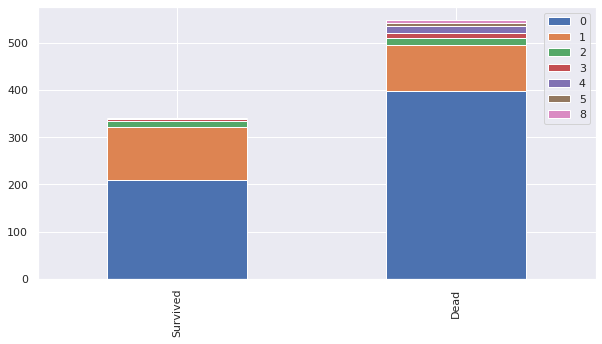

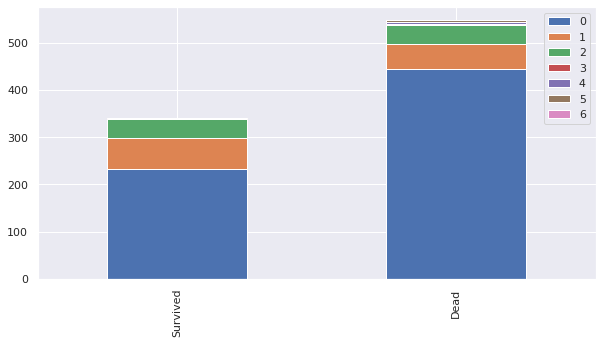

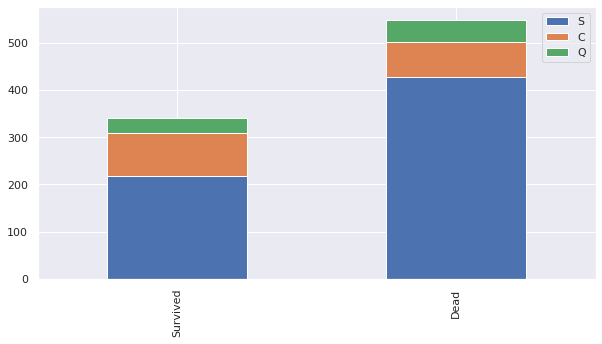

In [9]:
bar_chart(train, 'Sex') #남자가 많이 죽고, 여자가 많이 살았네 (strongly)
bar_chart(train, 'Pclass') # 3등급이 많이 죽긴 하였네 
bar_chart(train, 'SibSp') # 가족이 없는 경우네는 많이 죽긴 하였네 (weakly)
bar_chart(train, 'Parch') 
bar_chart(train, 'Embarked') 

<AxesSubplot:>

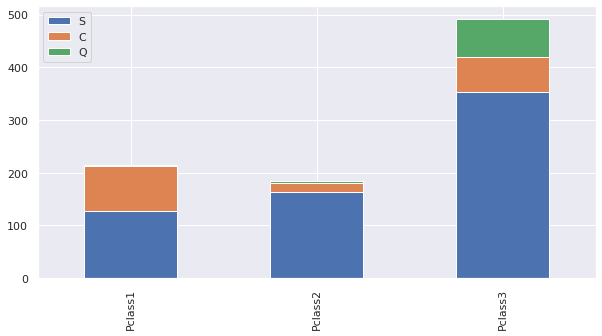

In [10]:
# 1등급/2등급/3등급 승객의 탑승지 bar_chart
pclass1 = train.loc[train['Pclass']==1, 'Embarked'].value_counts()
pclass2 = train.loc[train['Pclass']==2, 'Embarked'].value_counts()
pclass3 = train.loc[train['Pclass']==3, 'Embarked'].value_counts()
sset = pd.DataFrame([pclass1, pclass2, pclass3])
sset.index = ['Pclass1','Pclass2', 'Pclass3']
sset.plot(kind='bar', stacked = True, figsize=(10,5))

### 2단계: Feature 추출하기
- 결측데이터를 채워주거나 삭제하기
- 없는 데이터를 추가로 추출하여 Feature로 활용하기 (이름에서 Mr인지 Ms인지 추출)
- 문자데이터를 숫자로 변형해주기(Mr 면 1 , Ms면 2 , Dr면 3 이런식) 
- Feature Range를 조절해주기 (Age를 10대/20대/30대 이런식으로)
- Feature와 Label(정답지)를 분리하기

In [11]:
# 이름에서 성별 정보등을 Title이라는 키로 추출하기
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Jonkheer      1
Lady          1
Capt          1
Ms            1
Sir           1
Don           1
Mme           1
Name: Title, dtype: int64

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [13]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master":3, "Dr": 3, "Rev": 3, "Col": 3 , "Major":3, "Mlle":3, "Countess":3, "Ms": 3, "Lady": 3 , "Jonkheer": 3, "Don": 3, "Dona": 3 , "Mme":3, "Capt": 3, "Sir":3}

for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping)

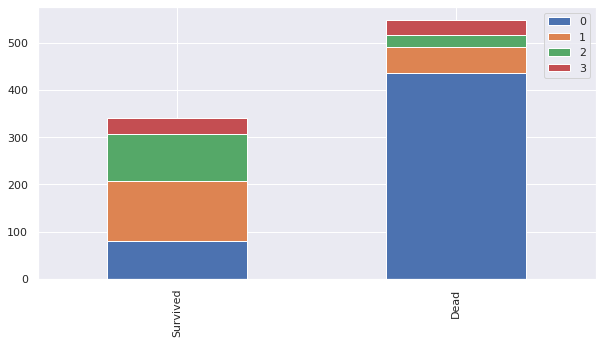

In [14]:
bar_chart(train, 'Title')
train['Title'].value_counts() #보면 Mr(0)는 확실히 많이 죽었음
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [15]:
sex_mapping = {'male': 0, "female": 1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [16]:
# 결측데이터 채우기 (물론 버려도 됨)
# 여기서는 Mr / Ms / Mrs 그룹들의 평균 나이를 결측데이터로 넣어줄것임
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [18]:
def facet_plot(df,feature, range_opt=None):
    facet = sns.FacetGrid(df, hue='Survived', aspect=4)
    facet.map(sns.kdeplot, feature, shade = True)

    if not range_opt:
        facet.set(xlim=(0, train[feature].max()))
    else:
        facet.set(xlim=range_opt)
    facet.add_legend()

    plt.show()

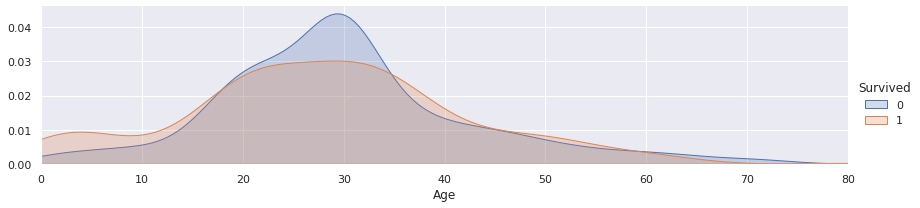

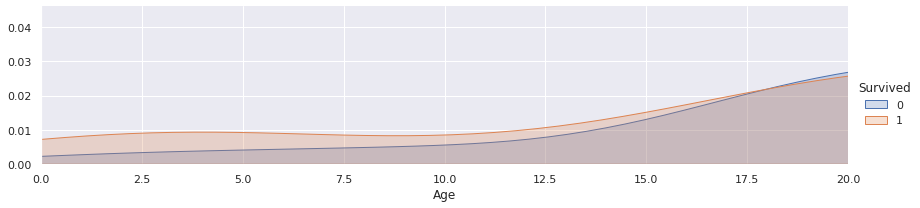

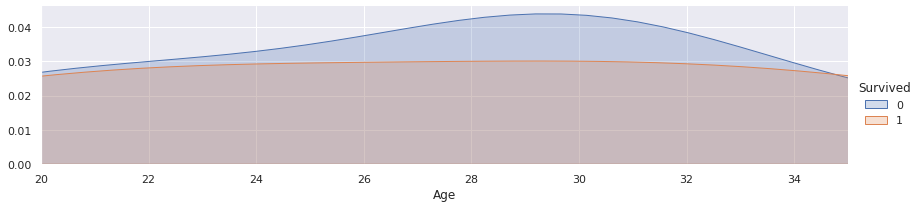

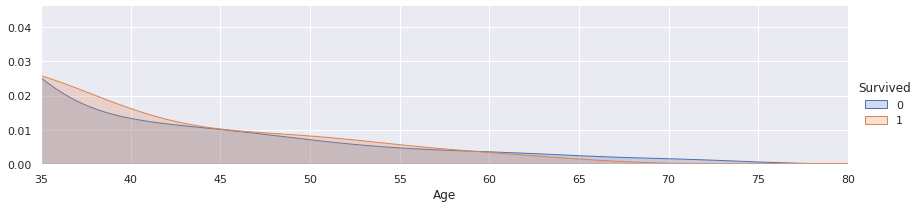

In [19]:
facet_plot(train,'Age')
facet_plot(train,'Age', [0,20])
facet_plot(train,'Age', [20,35]) # 20~35세는 많이 죽은 것을 볼 수 있네
facet_plot(train,'Age', [35,80])

### Blinning
- Blinning/Converting Numerical Age to Categorical Variable

- feature vector map:
    - child: 0
    - young: 1
    - adult: 2
    - mid-age: 3
    - senior: 4

In [20]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16 , 'Age'] =0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <=36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <=62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62  , 'Age'] = 4


In [21]:
# Embarked 결측데이터 채우기
# 보통 S에서 탔더라고,S로 채우자

embarked_mapping={"S": 0, "C": 1, "Q": 2}

for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            3
dtype: int64

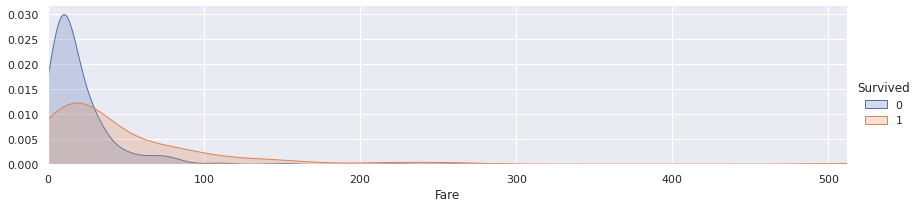

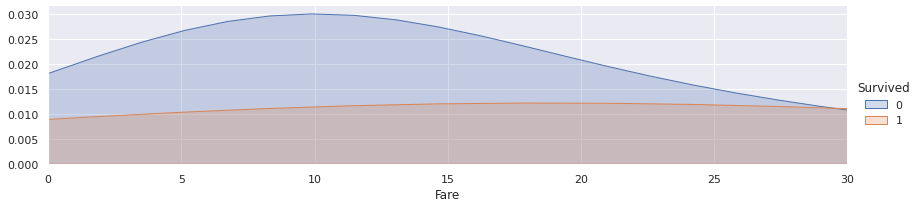

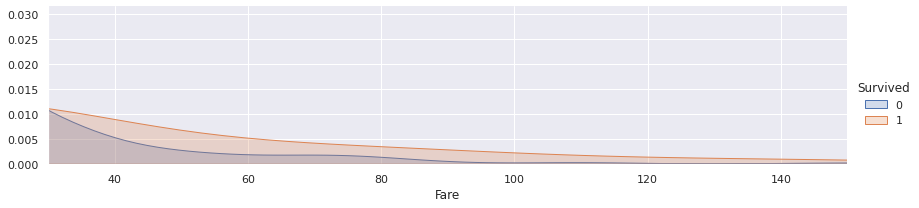

In [22]:
facet_plot(train, 'Fare')
facet_plot(train, 'Fare', [0,30]) #이 구간은 많이 죽음
facet_plot(train, 'Fare', [30,150]) # 이 이후부터는 많이 살았음

In [23]:
# binning
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] =0 
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <=30), 'Fare'] =1 
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <=100), 'Fare'] =2
    dataset.loc[dataset['Fare'] > 100, 'Fare'] =3  
    

In [24]:
train['Fare'].value_counts()

0.0    496
2.0    181
1.0    161
3.0     53
Name: Fare, dtype: int64

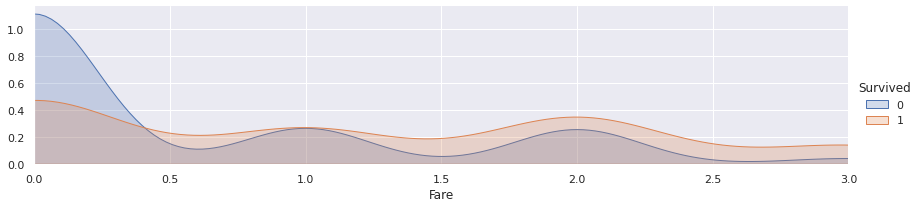

In [25]:
facet_plot(train,'Fare')

In [26]:
train['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
D              3
              ..
D56            1
E10            1
A26            1
A6             1
F G63          1
Name: Cabin, Length: 147, dtype: int64

In [27]:
cabin_mapiing={"A": 0, "B": 0.4 , "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] =dataset['Cabin'].str[:1]
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapiing)

train['Cabin'].fillna( train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna( test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)


In [28]:
test['Cabin'].value_counts()

2.0    308
0.8     62
0.4     18
1.2     13
1.6      9
0.0      7
2.4      1
Name: Cabin, dtype: int64

In [29]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
Title          0
dtype: int64

In [30]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [31]:
train['FamilySize'] = train['SibSp'] + train['Parch']+1
test['FamilySize'] = test['SibSp'] + test['Parch'] +1

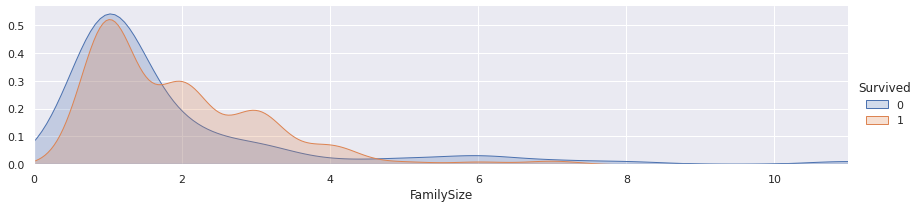

In [32]:
facet_plot(train, "FamilySize")

In [33]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}

for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [34]:
features_drop = ['Ticket', 'SibSp', 'Parch', 'PassengerId']
train = train.drop(features_drop, axis= 1)
test = test.drop(features_drop, axis=1)

In [35]:
train_data = train.drop('Survived', axis =1)
target = train['Survived']

train_data.shape, target.shape, test.shape

((891, 8), (891,), (418, 8))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   Fare        417 non-null    float64
 4   Cabin       418 non-null    float64
 5   Embarked    418 non-null    int64  
 6   Title       418 non-null    int64  
 7   FamilySize  418 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 26.2 KB


In [36]:
train_data.head(3)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0


### 3단계: 학습
- 예측모델(Classifier: kNN, RandomForest, Baysian, SVM)  
1) kNN (가까운 이웃)  
2) Decision Tree (논리 순서)  
3) Random Forest (논리 순서, 여러개 세트를 두고 다수결)  
4) 베이지안 룰 (확률)  
5) SVM (서포트 벡터 머신))  


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [39]:
clf = KNeighborsClassifier(n_neighbors=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv= k_fold, n_jobs =1 , scoring=scoring)
print(np.mean(score))

0.8260424469413232


In [40]:
clf = RandomForestClassifier(n_estimators=13)
score = cross_val_score(clf, train_data, target, cv= k_fold, n_jobs =1 , scoring=scoring)
print(np.mean(score))


0.8103370786516854


In [41]:
clf = GaussianNB()
score = cross_val_score(clf, train_data, target, cv= k_fold, n_jobs =1 , scoring=scoring)
print(np.mean(score))

0.7878027465667914


In [42]:
clf = SVC()
score = cross_val_score(clf, train_data, target, cv= k_fold, n_jobs =1 , scoring=scoring)
print(np.mean(score))

0.8350187265917602


In [43]:
clf = SVC() #SVM 모델이 정확도가 제일 좋으니까 83%로,, 이걸로 예측을 하자!
clf.fit(train_data, target)

prediction = clf.predict(test)

In [44]:
# 출력하기
submission = pd.DataFrame\
({"PassengerId": test_original['PassengerId'],
  "Survived": prediction })

submission.to_csv('submission_wook.csv',index=False)

In [45]:
submission = pd.read_csv('submission_wook.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### 끝